Regrid each files -> average -> plot

In [2]:
import xesmf as xe
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob as glob
import os
import pandas as pd
from pvlib.solarposition import get_solarposition

In [9]:
# Load the dataset
files = sorted(glob.glob(
    "/home/alubianashari/no2_trop_raqms/tracer.202308*.nc"
))
print(files)


['/home/alubianashari/no2_trop_raqms/tracer.2023080100.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080106.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080112.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080118.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080200.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080206.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080212.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080218.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080300.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080306.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080312.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080318.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080400.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080406.5deg.ll.nc', '/home/alubianashari/no2_trop_raqms/tracer.2023080412.5deg.ll

In [10]:
raqms_ds = xr.open_dataset(files[0])
print(raqms_ds)
print(raqms_ds.dims)
print(raqms_ds.coords)


<xarray.Dataset> Size: 4MB
Dimensions:          (time: 1, lat: 361, lon: 720, grid_yt: 361, grid_xt: 720)
Coordinates:
  * grid_yt          (grid_yt) float64 3kB -90.0 -89.5 -89.0 ... 89.0 89.5 90.0
  * grid_xt          (grid_xt) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * time             (time) datetime64[ns] 8B 2023-08-01
    lat              (lat, lon) float32 1MB ...
    lon              (lat, lon) float32 1MB ...
Data variables:
    no2_trop_column  (time, lat, lon) float64 2MB ...
FrozenMappingWarningOnValuesAccess({'time': 1, 'lat': 361, 'lon': 720, 'grid_yt': 361, 'grid_xt': 720})
Coordinates:
  * grid_yt  (grid_yt) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * grid_xt  (grid_xt) float64 6kB 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * time     (time) datetime64[ns] 8B 2023-08-01
    lat      (lat, lon) float32 1MB ...
    lon      (lat, lon) float32 1MB ...


In [11]:
timestamp_str = os.path.basename(files[0]).split('.')[1]
timestamp = pd.to_datetime(timestamp_str, format='%Y%m%d%H')
print(timestamp)

2023-08-01 00:00:00


In [12]:
raqms_lat = raqms_ds['grid_yt'].values
raqms_lon = raqms_ds['grid_xt'].values
#Create 2D grid for lat/lon ---
lon2d, lat2d = np.meshgrid(raqms_lon, raqms_lat)  # shape (361, 720)

In [13]:
#one lat/lon per point
flat_lat = lat2d.flatten()
flat_lon = lon2d.flatten()
flat_time = np.full_like(flat_lat, fill_value=timestamp, dtype='datetime64[ns]')

In [14]:
solpos = get_solarposition(flat_time, flat_lat, flat_lon)
print(solpos)

            apparent_zenith      zenith  apparent_elevation  elevation  \
2023-08-01       108.132766  108.132766          -18.132766 -18.132766   
2023-08-01       108.132766  108.132766          -18.132766 -18.132766   
2023-08-01       108.132766  108.132766          -18.132766 -18.132766   
2023-08-01       108.132766  108.132766          -18.132766 -18.132766   
2023-08-01       108.132766  108.132766          -18.132766 -18.132766   
...                     ...         ...                 ...        ...   
2023-08-01        71.821389   71.871793           18.178611  18.128207   
2023-08-01        71.821389   71.871793           18.178611  18.128207   
2023-08-01        71.821389   71.871793           18.178611  18.128207   
2023-08-01        71.821389   71.871793           18.178611  18.128207   
2023-08-01        71.821389   71.871793           18.178611  18.128207   

               azimuth  equation_of_time  
2023-08-01  181.603103         -6.409105  
2023-08-01  181.103103   

In [15]:
sza_flat = solpos['apparent_zenith'].values
sza = sza_flat.reshape(lat2d.shape)
sza

array([[108.13276556, 108.13276556, 108.13276556, ..., 108.13276556,
        108.13276556, 108.13276556],
       [108.63256265, 108.63266598, 108.63273113, ..., 108.63202367,
        108.63224148, 108.63242115],
       [109.13235841, 109.13256568, 109.13269637, ..., 109.13127728,
        109.13171418, 109.13207457],
       ...,
       [ 72.81800412,  72.81820839,  72.81833719, ...,  72.81693863,
         72.81736921,  72.81772439],
       [ 72.3197347 ,  72.31983713,  72.31990172, ...,  72.31920039,
         72.31941631,  72.31959442],
       [ 71.82138875,  71.82138875,  71.82138875, ...,  71.82138875,
         71.82138875,  71.82138875]])

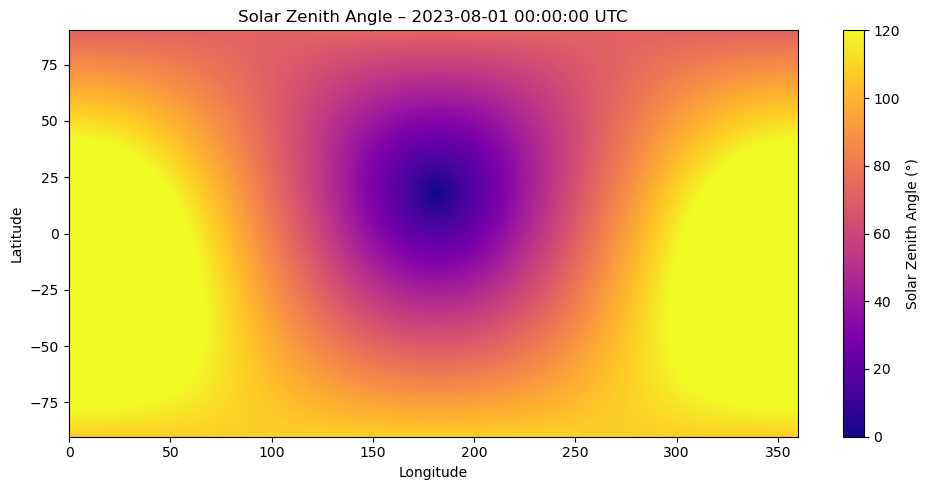

In [16]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(lon2d, lat2d, sza, shading='auto', cmap='plasma', vmin=0, vmax=120)
plt.colorbar(label='Solar Zenith Angle (°)')
plt.title(f'Solar Zenith Angle – {timestamp} UTC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

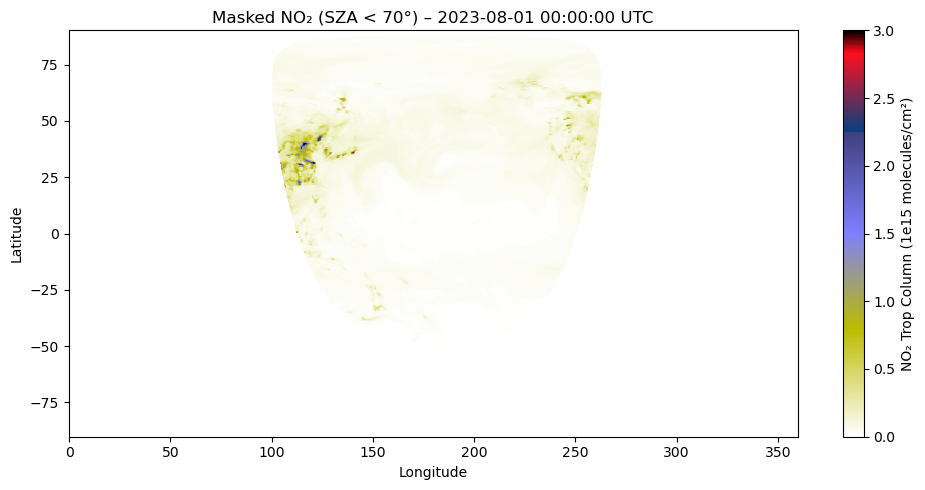

In [ ]:
#mask where SZA is >= 70 degrees (keep no2 data where SZA < 70)

no2 = raqms_ds['no2_trop_column'].isel(time=0) / 10  # Convert from 1e15 to 1e16 molecules/cm²
no2_masked = np.where(sza >= 70, np.nan, no2)

plt.figure(figsize=(10, 5))
plt.pcolormesh(lon2d, lat2d, no2_masked, shading='auto', cmap='gist_stern_r', vmin=0, vmax=3)
plt.colorbar(label='NO₂ Trop Column (1e16 molecules/cm²)')
plt.title(f'Masked NO₂ (SZA < 70°) – {timestamp} UTC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()



In [18]:
raqms_lat.shape, raqms_lon.shape

((361,), (720,))

In [19]:
gems_file = '/ships22/raqms/Satellite/GEMS/L3/NO2/GK2_GEMS_L3_20230802_NO2_GRID-EA_daily_010.nc'
gems_ds = xr.open_dataset(gems_file, group='Geolocation Fields')

gems_lat = gems_ds['Latitude']
gems_lon = gems_ds['Longitude']
gems_ds

<xarray.Dataset> Size: 6MB
Dimensions:    (image: 540, spatial: 750)
Dimensions without coordinates: image, spatial
Data variables:
    Longitude  (image, spatial) float64 3MB ...
    Latitude   (image, spatial) float64 3MB ...

In [20]:
source_grid = {'lat': raqms_lat, 'lon': raqms_lon}
target_grid = {'lat': gems_lat, 'lon': gems_lon}

In [21]:
regridder = xe.Regridder(source_grid, target_grid, method='bilinear', periodic=True)


In [24]:
#for all files

output_dir = "no2_trop_RAQMS_Regridded_GEMS_nc"
os.makedirs(output_dir, exist_ok=True)

for file_path in files:
    ds = xr.open_dataset(file_path)
    timestamp_str = os.path.basename(file_path).split('.')[1]
    timestamp = pd.to_datetime(timestamp_str, format='%Y%m%d%H')

# Extract lat/lon and build 2D grid
    raqms_lat = ds['grid_yt'].values
    raqms_lon = ds['grid_xt'].values
    lon2d, lat2d = np.meshgrid(raqms_lon, raqms_lat)

# Flatten for SZA calculation
    flat_lat = lat2d.flatten()
    flat_lon = lon2d.flatten()
    flat_time = np.full_like(flat_lat, fill_value=timestamp, dtype='datetime64[ns]')
# SZA calculation  
    solpos = get_solarposition(flat_time, flat_lat, flat_lon)
    sza_flat = solpos['apparent_zenith'].values
    sza = sza_flat.reshape(lat2d.shape)

# Mask NO₂
    no2 = ds['no2_trop_column'].isel(time=0).values / 10 # Convert from 1e15 to 1e16 molecules/cm
    no2_masked = np.where(sza >= 70, np.nan, no2)

    # Wrap as DataArray
    no2_da = xr.DataArray(
        no2_masked,
        dims=['lat', 'lon'],
        coords={'lat': raqms_lat, 'lon': raqms_lon}
    )

# Regrid
    no2_regridded = regridder(no2_da)

# Save regridded nc files
    base = os.path.basename(file_path)
    out_path = os.path.join(output_dir, base)

    # Delete if exists (to avoid permission error)
    if os.path.exists(out_path):
        os.remove(out_path)
    
    out_ds = xr.Dataset({'no2_trop_column': no2_regridded})
    out_ds.to_netcdf(out_path)
    print(f"Saved regridded file: {out_path}")



/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080100.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080106.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080112.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080200.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080206.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080212.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080218.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080300.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080306.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080312.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080318.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080400.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080406.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080412.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080418.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080500.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080506.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080512.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080518.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080600.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080606.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080612.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080618.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080700.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080706.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080712.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080718.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080800.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080806.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080812.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080818.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080900.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080906.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080912.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080918.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081000.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081006.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081012.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081018.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081100.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081106.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081112.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081200.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081206.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081212.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081218.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081300.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081306.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081312.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081318.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081400.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081406.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081412.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081418.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081500.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081506.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081512.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081518.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081600.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081606.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081612.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081618.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081700.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081706.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081712.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081718.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081800.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081806.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081812.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081818.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081900.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081906.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081912.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023081918.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082000.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082006.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082012.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082018.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082100.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082106.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082112.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082200.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082206.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082212.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082218.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082300.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082306.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082312.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082318.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082400.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082406.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082412.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082418.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082500.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082506.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082512.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082518.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082600.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082606.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082612.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082618.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082700.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082706.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082712.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082718.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082800.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082806.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082812.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082818.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082900.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082906.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082912.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023082918.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023083000.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023083006.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023083012.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023083018.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023083100.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023083106.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023083112.5deg.ll.nc
Saved regridded file: no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023083118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


In [25]:
n_files = sorted(glob.glob("/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.202308*.nc"))
print(n_files)

['/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080100.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080106.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080112.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080118.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080200.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080206.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080212.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080218.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080300.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080306.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080312.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.202

In [26]:
#grouping files by day
daily_files = {}
for f in n_files:
    filename = os.path.basename(f)
    timestamp = filename.split('.')[1]
    date_str = timestamp[:8]

    if date_str not in daily_files:
        daily_files[date_str] = [f]
    else:
        daily_files[date_str].append(f)
print(daily_files.keys())

dict_keys(['20230801', '20230802', '20230803', '20230804', '20230805', '20230806', '20230807', '20230808', '20230809', '20230810', '20230811', '20230812', '20230813', '20230814', '20230815', '20230816', '20230817', '20230818', '20230819', '20230820', '20230821', '20230822', '20230823', '20230824', '20230825', '20230826', '20230827', '20230828', '20230829', '20230830', '20230831'])


In [5]:
day_files = daily_files['20230802']
print(day_files)

['/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080200.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080206.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080212.5deg.ll.nc', '/home/alubianashari/no2_trop_RAQMS_Regridded_GEMS_nc/tracer.2023080218.5deg.ll.nc']


In [27]:
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# --- Helper Functions ---
def plot_background(ax):
    ax.add_feature(cf.LAKES.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=0.8)
    ax.add_feature(cf.COASTLINE.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=1)
    ax.add_feature(cf.BORDERS.with_scale('10m'), linestyle=':')
    return ax

def plot_ticks(ax, lon_min, lon_max, lat_min, lat_max):
    ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(number_format='.0f', degree_symbol='°'))
    ax.yaxis.set_major_formatter(LatitudeFormatter(number_format='.0f', degree_symbol='°'))
    return ax


os.makedirs("no2_trop_Regridded_RAQMS_GEMS_Figures", exist_ok=True)

# Plotting NO2 for a specific day
# Loop through the dates and plot the NO2 data
dates = [
    '20230801', '20230802', '20230803', '20230804', '20230805',
    '20230806', '20230807', '20230808', '20230809', '20230810',
    '20230811', '20230812', '20230813', '20230814', '20230815',
    '20230816', '20230817', '20230818', '20230819', '20230820',
    '20230821', '20230822', '20230823', '20230824', '20230825',
    '20230826', '20230827', '20230828', '20230829', '20230830',
    '20230831'
]

for i in range(len(dates)):
    date = dates[i]
    print(date)
    day_files = daily_files[date]

    datasets = xr.open_dataset(day_files[0])
    lat = datasets['Latitude']
    lon = datasets['Longitude']
    ds_NO2_00 = np.array(datasets['no2_trop_column'])
    datasets = xr.open_dataset(day_files[1])
    ds_NO2_06 = np.array(datasets['no2_trop_column'])
    datasets = xr.open_dataset(day_files[2])
    ds_NO2_12 = np.array(datasets['no2_trop_column'])
    datasets = xr.open_dataset(day_files[3])
    ds_NO2_18 = np.array(datasets['no2_trop_column'])
    # Stack and average NO2
    ds_NO2 = np.stack([ds_NO2_00, ds_NO2_06, ds_NO2_12, ds_NO2_18], axis=0)
    no2_daily_avg = np.nanmean(ds_NO2, axis=0)


# Plotting
    fig = plt.figure(figsize=(10, 6), dpi=150)
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set map extent
    lon_min, lon_max = lon.min(), lon.max()
    lat_min, lat_max = lat.min(), lat.max()
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    plot_background(ax)
    plot_ticks(ax, lon_min, lon_max, lat_min, lat_max)

    mesh = ax.pcolormesh(lon, lat, no2_daily_avg, cmap="gist_stern_r", vmin=0, vmax=3, transform=ccrs.PlateCarree())
    plt.colorbar(mesh, orientation='horizontal', label='Daily Avg NO₂ (10¹⁶ molecules/cm²)', fraction=0.046, pad=0.1)

    ax.set_title(f'RAQMS Daily Avg NO₂ Troposphere Column – {date}')
    plt.savefig(f"no2_trop_Regridded_RAQMS_GEMS_Figures/{date}.png", facecolor='white', bbox_inches='tight')
    plt.close()


20230801


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230802


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230803


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230804


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230805


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230806


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230807


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230808


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230809


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230810


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230811


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230812


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230813


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230814


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230815


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230816


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230817


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230818


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230819


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230820


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230821


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230822


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230823


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230824


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230825


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230826


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230827


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230828


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230829


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230830


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230831


/tmp/ipykernel_1544334/1383880538.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_1544334/1383880538.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())
